ANÁLISE EXPLORATÓRIA DE DADOS - ESTATÍSTICA DESCRITIVA

Dataset criado com 1000 observações e 9 variáveis

Primeiras 5 linhas do dataset:
   vendas_mensais  satisfacao_cliente  tempo_atendimento  numero_produtos  \
0     9404.827796            8.709113          11.711339                5   
1     6816.463802            7.355050          14.796386                8   
2     6472.649420            6.112837          16.294895                3   
3     6472.707274            9.238238          17.219026                4   
4    15196.220233            8.762905          22.715986                4   

   valor_ticket  idade_cliente  experiencia_vendedor  bonus_vendedor  \
0     50.348506      37.091495              9.250680      200.387517   
1     99.244719      51.546527              8.378817       65.447288   
2     42.943821      28.171204             15.586725      112.839353   
3     62.453694      30.714633              7.098839       98.826600   
4     60.623004      27.902722         

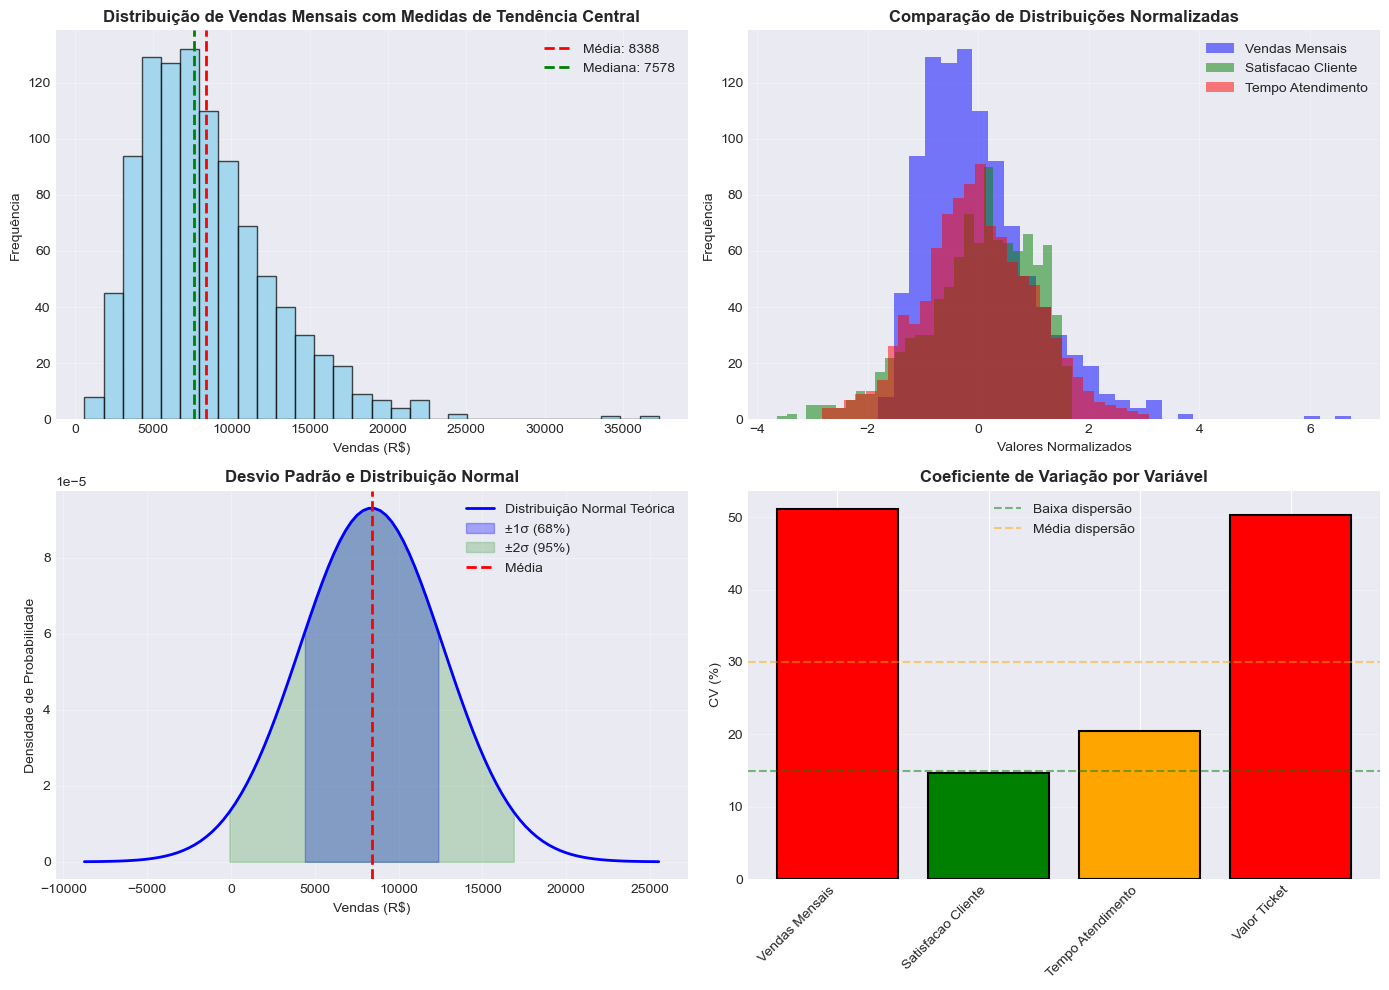


MEDIDAS DE POSIÇÃO

Variável: Vendas Mensais
Q1 (25º percentil): R$ 5,335.02
Q2 (50º percentil/Mediana): R$ 7,577.56
Q3 (75º percentil): R$ 10,541.00
IQR (Amplitude Interquartílica): R$ 5,205.98

Identificação de Outliers:
Limite inferior: R$ -2,473.94
Limite superior: R$ 18,349.96
Número de outliers detectados: 30


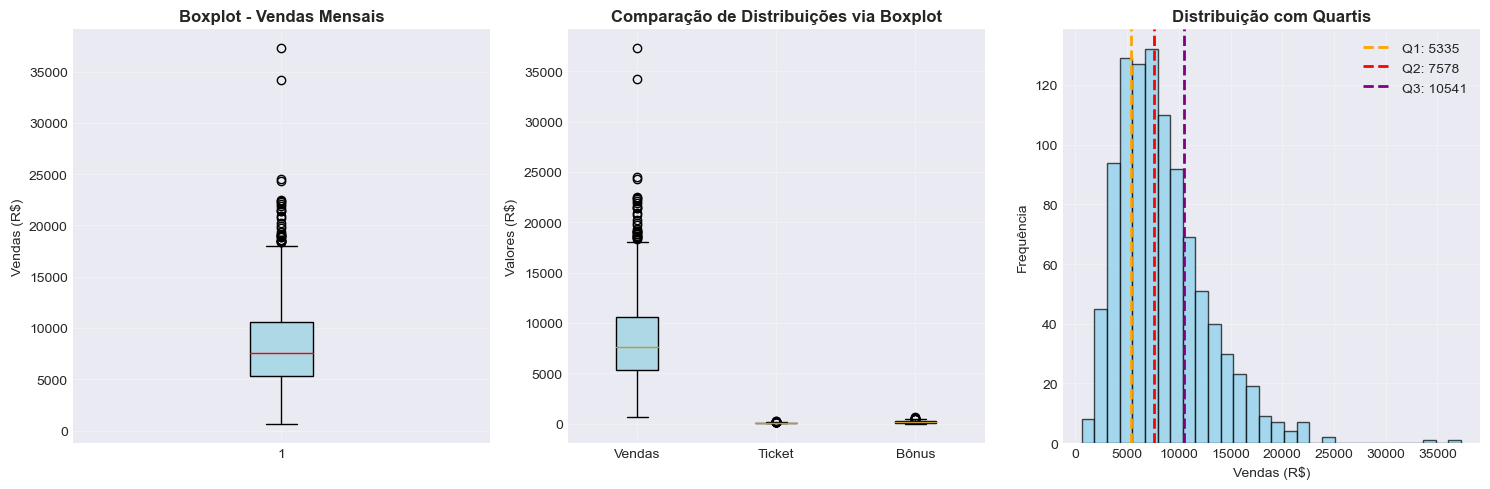


MEDIDAS DE FORMA DA DISTRIBUIÇÃO

Variável: Vendas Mensais
Assimetria (Skewness): 1.317
Curtose (Kurtosis): 3.596
Interpretação: assimetria positiva (cauda à direita), leptocúrtica (mais pontiaguda)

Variável: Satisfacao Cliente
Assimetria (Skewness): -0.713
Curtose (Kurtosis): 0.243
Interpretação: assimetria negativa (cauda à esquerda), mesocúrtica (similar à normal)

Variável: Tempo Atendimento
Assimetria (Skewness): 0.067
Curtose (Kurtosis): -0.025
Interpretação: aproximadamente simétrica, mesocúrtica (similar à normal)


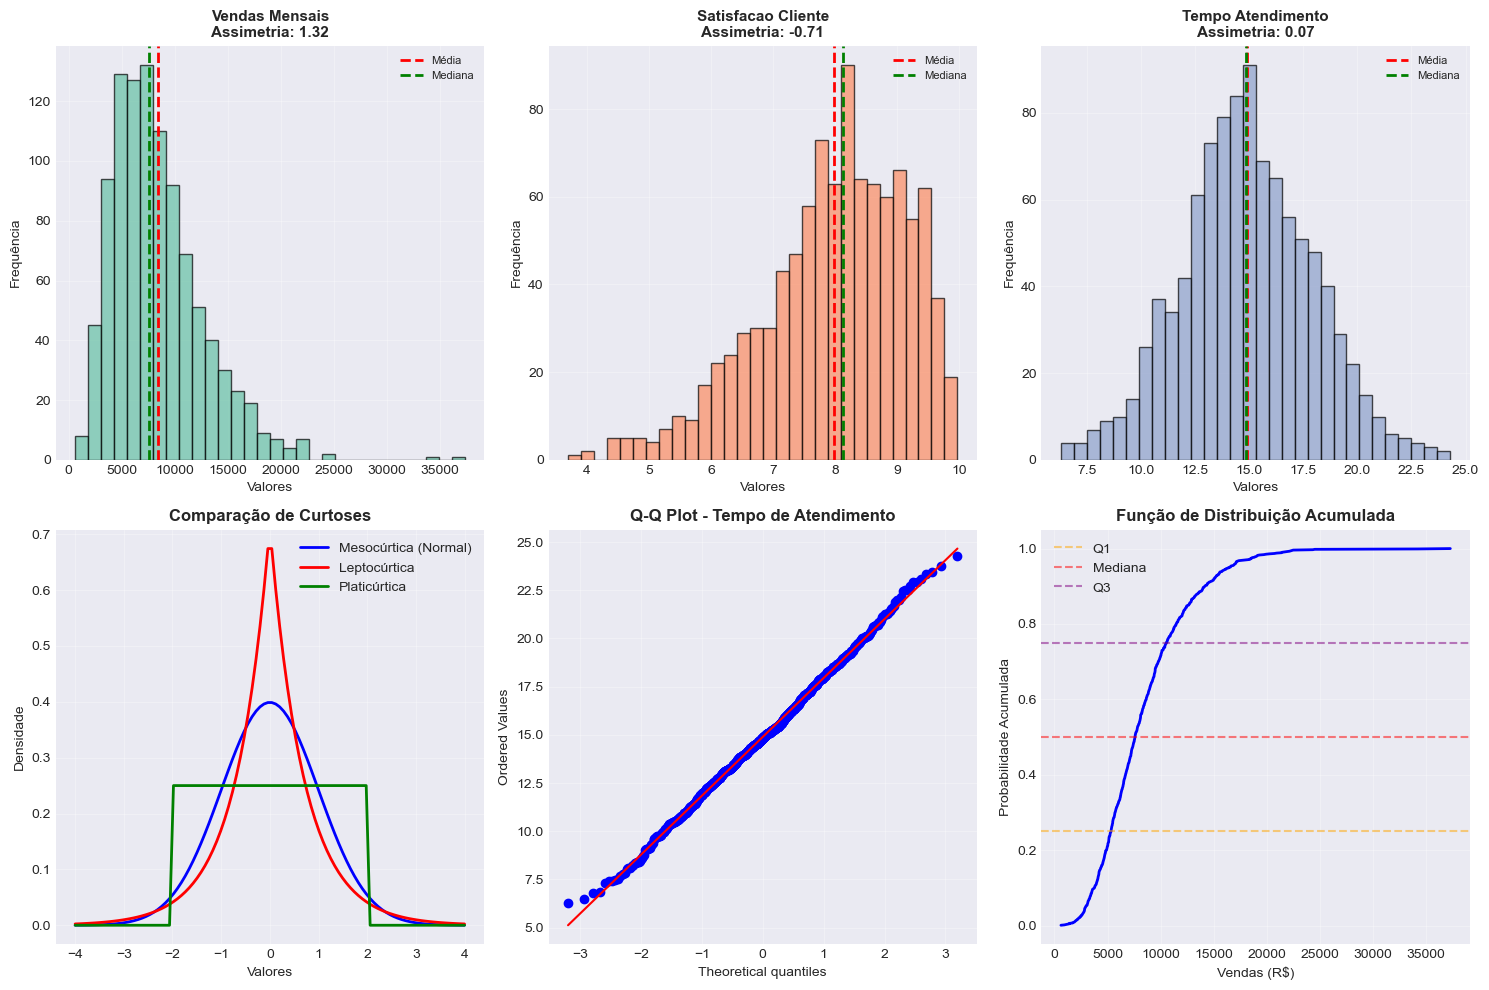


ESTATÍSTICAS MULTIVARIADAS

Matriz de Correlação de Pearson:
                      vendas_mensais  bonus_vendedor  experiencia_vendedor  \
vendas_mensais                 1.000           0.788                -0.006   
bonus_vendedor                 0.788           1.000                -0.084   
experiencia_vendedor          -0.006          -0.084                 1.000   
tempo_empresa                  0.004          -0.063                 0.915   
valor_ticket                  -0.012          -0.019                 0.010   
satisfacao_cliente             0.018           0.005                -0.012   

                      tempo_empresa  valor_ticket  satisfacao_cliente  
vendas_mensais                0.004        -0.012               0.018  
bonus_vendedor               -0.063        -0.019               0.005  
experiencia_vendedor          0.915         0.010              -0.012  
tempo_empresa                 1.000         0.003              -0.013  
valor_ticket                  0

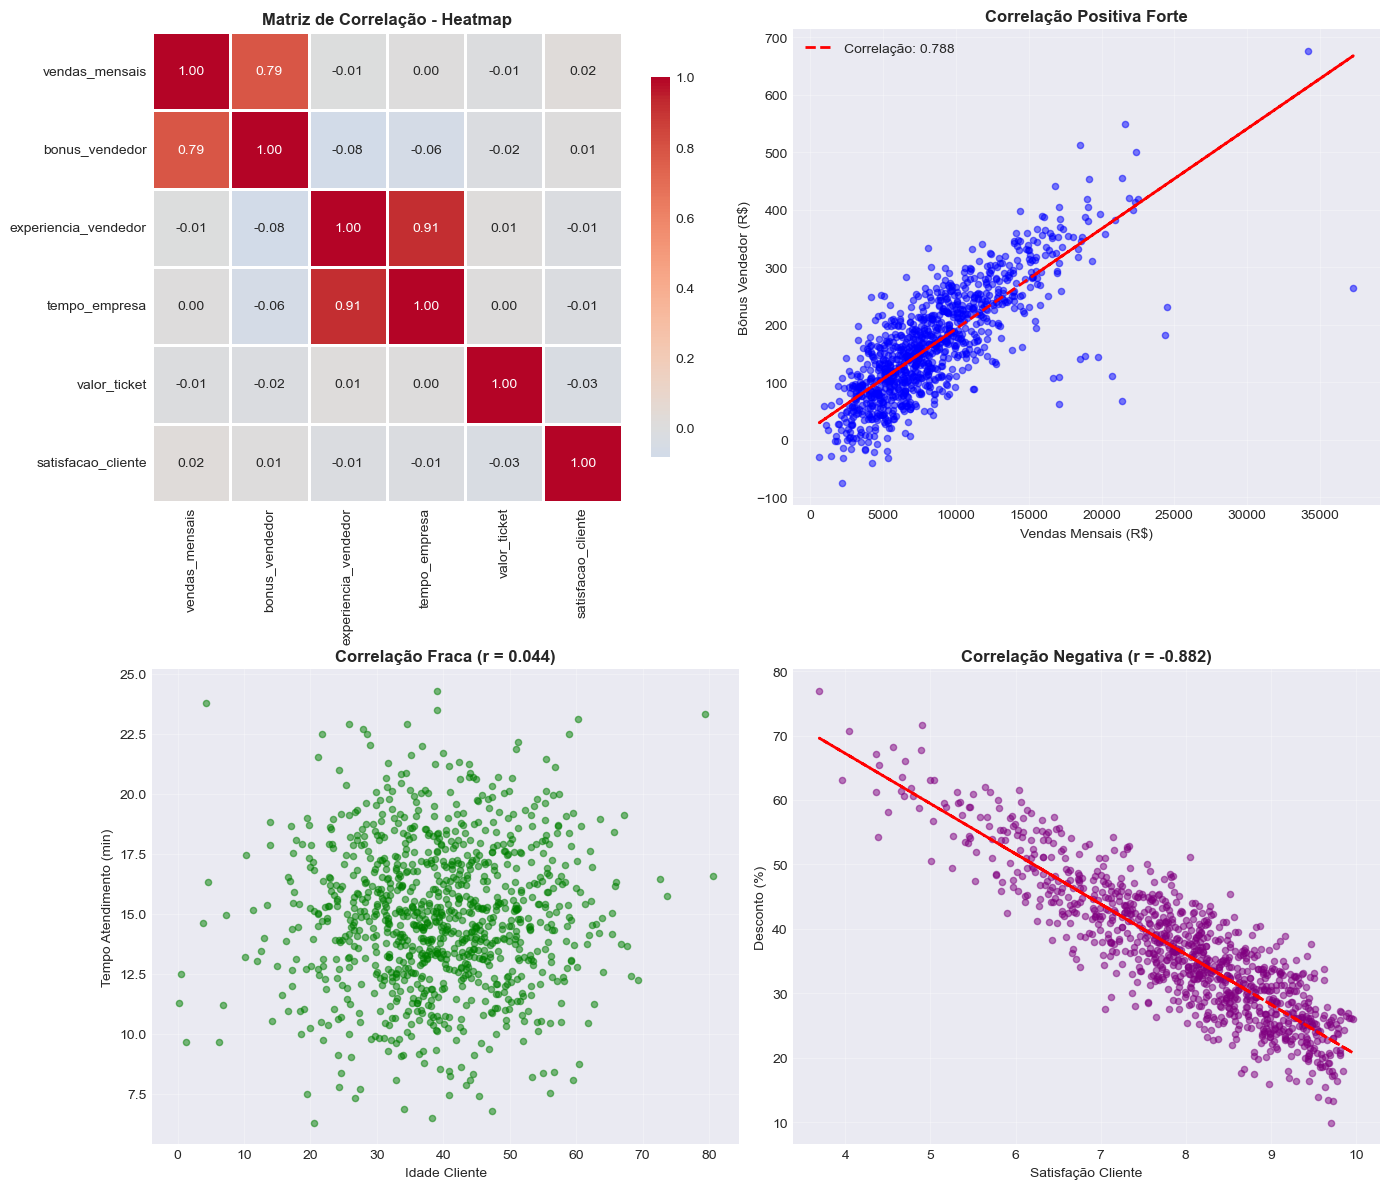


RESUMO ESTATÍSTICO COMPLETO DO DATASET

Estatísticas Descritivas Completas:
                       count     mean      std     min      25%      50%  \
vendas_mensais        1000.0  8387.65  4284.65  606.83  5335.02  7577.56   
satisfacao_cliente    1000.0     7.97     1.18    3.69     7.28     8.13   
tempo_atendimento     1000.0    14.89     3.05    6.30    12.93    14.83   
numero_produtos       1000.0     3.96     1.72    1.00     3.00     4.00   
valor_ticket          1000.0    61.13    30.72    7.68    39.30    54.85   
idade_cliente         1000.0    39.33    11.78    0.15    31.72    39.07   
experiencia_vendedor  1000.0    10.10     5.69    0.01     5.15    10.27   
bonus_vendedor        1000.0   165.01    94.60  -75.13    95.39   156.02   
tempo_empresa         1000.0     8.28     4.87    0.01     4.01     8.55   
desconto              1000.0    36.27    10.39    9.93    28.64    35.17   

                           75%       max    CV%  Assimetria  Curtose  
vendas_mensais 

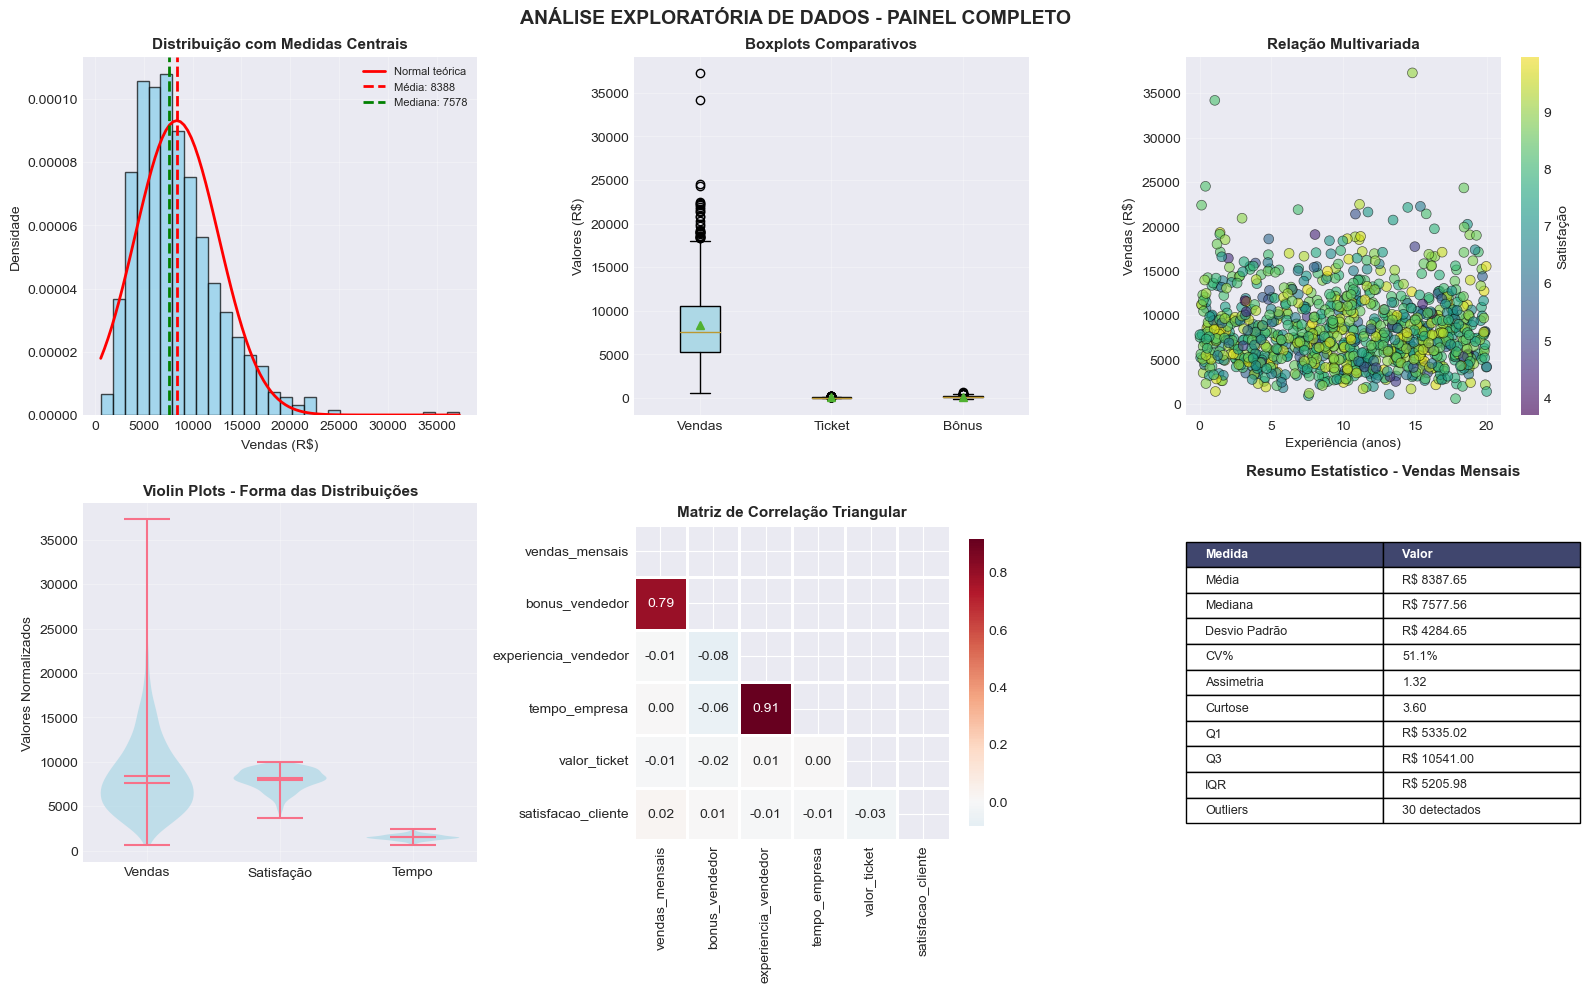


ANÁLISE CONCLUÍDA COM SUCESSO!

Principais insights:
1. A variável vendas_mensais apresenta assimetria positiva
2. Existe forte correlação positiva entre vendas e bônus
3. Foram detectados outliers que podem requerer investigação
4. O CV indica média dispersão para a maioria das variáveis
5. As medidas de forma sugerem distribuições não-normais para algumas variáveis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# =============================================================================
# 1. GERAÇÃO DO DATASET SINTÉTICO
# =============================================================================

np.random.seed(42)

# Criando um dataset de vendas de uma empresa fictícia
n_samples = 1000

# Variáveis do dataset
data = {
    'vendas_mensais': np.random.gamma(4, 2000, n_samples),  # Assimetria positiva
    'satisfacao_cliente': np.random.beta(8, 2, n_samples) * 10,  # Assimetria negativa
    'tempo_atendimento': np.random.normal(15, 3, n_samples),  # Normal
    'numero_produtos': np.random.poisson(3, n_samples) + 1,
    'valor_ticket': np.random.lognormal(4, 0.5, n_samples),
    'idade_cliente': np.random.normal(40, 12, n_samples),
    'experiencia_vendedor': np.random.uniform(0, 20, n_samples)
}

# Criando correlação entre algumas variáveis
data['bonus_vendedor'] = data['vendas_mensais'] * 0.02 + np.random.normal(0, 50, n_samples)
data['tempo_empresa'] = data['experiencia_vendedor'] * 0.8 + np.random.normal(0, 2, n_samples)

# Adicionando alguns outliers
outlier_indices = np.random.choice(n_samples, 20, replace=False)
data['vendas_mensais'][outlier_indices] *= np.random.uniform(2, 3, 20)

# Criando DataFrame
df = pd.DataFrame(data)

# Garantindo valores positivos onde necessário
df['idade_cliente'] = np.abs(df['idade_cliente'])
df['tempo_empresa'] = np.abs(df['tempo_empresa'])

print("="*80)
print("ANÁLISE EXPLORATÓRIA DE DADOS - ESTATÍSTICA DESCRITIVA")
print("="*80)
print(f"\nDataset criado com {len(df)} observações e {len(df.columns)} variáveis")
print("\nPrimeiras 5 linhas do dataset:")
print(df.head())

# =============================================================================
# 2. MEDIDAS DE TENDÊNCIA CENTRAL
# =============================================================================

print("\n" + "="*80)
print("MEDIDAS DE TENDÊNCIA CENTRAL")
print("="*80)

# Calculando estatísticas para vendas_mensais
media = df['vendas_mensais'].mean()
mediana = df['vendas_mensais'].median()
moda = df['vendas_mensais'].mode()[0] if len(df['vendas_mensais'].mode()) > 0 else None

print(f"\nVariável: Vendas Mensais")
print(f"Média: R$ {media:,.2f}")
print(f"Mediana: R$ {mediana:,.2f}")
print(f"Moda: R$ {moda:,.2f}" if moda else "Moda: Não há moda única")

# Visualização das medidas de tendência central
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma com medidas de tendência central
ax1 = axes[0, 0]
ax1.hist(df['vendas_mensais'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.0f}')
ax1.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.0f}')
ax1.set_title('Distribuição de Vendas Mensais com Medidas de Tendência Central', fontsize=12, fontweight='bold')
ax1.set_xlabel('Vendas (R$)')
ax1.set_ylabel('Frequência')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Comparação de distribuições com diferentes assimetrias
ax2 = axes[0, 1]
for col, color in [('vendas_mensais', 'blue'), ('satisfacao_cliente', 'green'), ('tempo_atendimento', 'red')]:
    data_norm = (df[col] - df[col].mean()) / df[col].std()
    ax2.hist(data_norm, bins=30, alpha=0.5, label=col.replace('_', ' ').title(), color=color)
ax2.set_title('Comparação de Distribuições Normalizadas', fontsize=12, fontweight='bold')
ax2.set_xlabel('Valores Normalizados')
ax2.set_ylabel('Frequência')
ax2.legend()
ax2.grid(True, alpha=0.3)

# =============================================================================
# 3. MEDIDAS DE DISPERSÃO
# =============================================================================

print("\n" + "="*80)
print("MEDIDAS DE DISPERSÃO")
print("="*80)

# Calculando medidas de dispersão
amplitude = df['vendas_mensais'].max() - df['vendas_mensais'].min()
variancia = df['vendas_mensais'].var()
desvio_padrao = df['vendas_mensais'].std()
cv = (desvio_padrao / media) * 100

print(f"\nVariável: Vendas Mensais")
print(f"Amplitude: R$ {amplitude:,.2f}")
print(f"Variância: {variancia:,.2f}")
print(f"Desvio Padrão: R$ {desvio_padrao:,.2f}")
print(f"Coeficiente de Variação: {cv:.2f}%")

# Visualização da dispersão
ax3 = axes[1, 0]
x = np.linspace(media - 4*desvio_padrao, media + 4*desvio_padrao, 100)
y = stats.norm.pdf(x, media, desvio_padrao)
ax3.plot(x, y, 'b-', linewidth=2, label='Distribuição Normal Teórica')
ax3.fill_between(x[np.abs(x - media) <= desvio_padrao], 
                  y[np.abs(x - media) <= desvio_padrao], 
                  alpha=0.3, color='blue', label=f'±1σ (68%)')
ax3.fill_between(x[np.abs(x - media) <= 2*desvio_padrao], 
                  y[np.abs(x - media) <= 2*desvio_padrao], 
                  alpha=0.2, color='green', label=f'±2σ (95%)')
ax3.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média')
ax3.set_title('Desvio Padrão e Distribuição Normal', fontsize=12, fontweight='bold')
ax3.set_xlabel('Vendas (R$)')
ax3.set_ylabel('Densidade de Probabilidade')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Comparação de CV entre variáveis
ax4 = axes[1, 1]
cv_values = []
variables = ['vendas_mensais', 'satisfacao_cliente', 'tempo_atendimento', 'valor_ticket']
for var in variables:
    cv_val = (df[var].std() / df[var].mean()) * 100
    cv_values.append(cv_val)

colors = ['green' if cv < 15 else 'orange' if cv < 30 else 'red' for cv in cv_values]
bars = ax4.bar(range(len(variables)), cv_values, color=colors, edgecolor='black', linewidth=1.5)
ax4.set_xticks(range(len(variables)))
ax4.set_xticklabels([v.replace('_', ' ').title() for v in variables], rotation=45, ha='right')
ax4.set_title('Coeficiente de Variação por Variável', fontsize=12, fontweight='bold')
ax4.set_ylabel('CV (%)')
ax4.axhline(y=15, color='green', linestyle='--', alpha=0.5, label='Baixa dispersão')
ax4.axhline(y=30, color='orange', linestyle='--', alpha=0.5, label='Média dispersão')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# =============================================================================
# 4. MEDIDAS DE POSIÇÃO (QUARTIS E PERCENTIS)
# =============================================================================

print("\n" + "="*80)
print("MEDIDAS DE POSIÇÃO")
print("="*80)

# Calculando quartis
q1 = df['vendas_mensais'].quantile(0.25)
q2 = df['vendas_mensais'].quantile(0.50)  # Mediana
q3 = df['vendas_mensais'].quantile(0.75)
iqr = q3 - q1

print(f"\nVariável: Vendas Mensais")
print(f"Q1 (25º percentil): R$ {q1:,.2f}")
print(f"Q2 (50º percentil/Mediana): R$ {q2:,.2f}")
print(f"Q3 (75º percentil): R$ {q3:,.2f}")
print(f"IQR (Amplitude Interquartílica): R$ {iqr:,.2f}")

# Identificação de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
outliers = df[(df['vendas_mensais'] < limite_inferior) | (df['vendas_mensais'] > limite_superior)]

print(f"\nIdentificação de Outliers:")
print(f"Limite inferior: R$ {limite_inferior:,.2f}")
print(f"Limite superior: R$ {limite_superior:,.2f}")
print(f"Número de outliers detectados: {len(outliers)}")

# Visualização com Boxplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot único
ax1 = axes[0]
bp = ax1.boxplot(df['vendas_mensais'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['medians'][0].set_color('red')
ax1.set_ylabel('Vendas (R$)')
ax1.set_title('Boxplot - Vendas Mensais', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Múltiplos boxplots para comparação
ax2 = axes[1]
data_to_plot = [df[col] for col in ['vendas_mensais', 'valor_ticket', 'bonus_vendedor']]
bp2 = ax2.boxplot(data_to_plot, labels=['Vendas', 'Ticket', 'Bônus'], patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_title('Comparação de Distribuições via Boxplot', fontsize=12, fontweight='bold')
ax2.set_ylabel('Valores (R$)')
ax2.grid(True, alpha=0.3)

# Histograma com quartis
ax3 = axes[2]
ax3.hist(df['vendas_mensais'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax3.axvline(q1, color='orange', linestyle='--', linewidth=2, label=f'Q1: {q1:.0f}')
ax3.axvline(q2, color='red', linestyle='--', linewidth=2, label=f'Q2: {q2:.0f}')
ax3.axvline(q3, color='purple', linestyle='--', linewidth=2, label=f'Q3: {q3:.0f}')
ax3.set_title('Distribuição com Quartis', fontsize=12, fontweight='bold')
ax3.set_xlabel('Vendas (R$)')
ax3.set_ylabel('Frequência')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 5. MEDIDAS DE FORMA (ASSIMETRIA E CURTOSE)
# =============================================================================

print("\n" + "="*80)
print("MEDIDAS DE FORMA DA DISTRIBUIÇÃO")
print("="*80)

# Calculando assimetria e curtose para diferentes variáveis
variables_shape = ['vendas_mensais', 'satisfacao_cliente', 'tempo_atendimento']

for var in variables_shape:
    assimetria = skew(df[var])
    kurt = kurtosis(df[var])
    
    print(f"\nVariável: {var.replace('_', ' ').title()}")
    print(f"Assimetria (Skewness): {assimetria:.3f}")
    print(f"Curtose (Kurtosis): {kurt:.3f}")
    
    # Interpretação
    if abs(assimetria) < 0.5:
        tipo_assimetria = "aproximadamente simétrica"
    elif assimetria > 0:
        tipo_assimetria = "assimetria positiva (cauda à direita)"
    else:
        tipo_assimetria = "assimetria negativa (cauda à esquerda)"
    
    if abs(kurt) < 0.5:
        tipo_curtose = "mesocúrtica (similar à normal)"
    elif kurt > 0:
        tipo_curtose = "leptocúrtica (mais pontiaguda)"
    else:
        tipo_curtose = "platicúrtica (mais achatada)"
    
    print(f"Interpretação: {tipo_assimetria}, {tipo_curtose}")

# Visualização das formas de distribuição
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Diferentes tipos de assimetria
for i, (var, ax) in enumerate(zip(variables_shape, axes[0])):
    ax.hist(df[var], bins=30, alpha=0.7, color=plt.cm.Set2(i), edgecolor='black')
    ax.axvline(df[var].mean(), color='red', linestyle='--', linewidth=2, label='Média')
    ax.axvline(df[var].median(), color='green', linestyle='--', linewidth=2, label='Mediana')
    
    skewness = skew(df[var])
    ax.set_title(f'{var.replace("_", " ").title()}\nAssimetria: {skewness:.2f}', 
                 fontsize=11, fontweight='bold')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Demonstração de diferentes curtoses
ax4 = axes[1, 0]
# Gerando dados com diferentes curtoses
x = np.linspace(-4, 4, 100)
normal = stats.norm.pdf(x, 0, 1)
leptocurtica = stats.laplace.pdf(x, 0, 0.7)
platicurtica = stats.uniform.pdf(x, -2, 4)

ax4.plot(x, normal, 'b-', linewidth=2, label='Mesocúrtica (Normal)')
ax4.plot(x, leptocurtica, 'r-', linewidth=2, label='Leptocúrtica')
ax4.plot(x, platicurtica, 'g-', linewidth=2, label='Platicúrtica')
ax4.set_title('Comparação de Curtoses', fontsize=12, fontweight='bold')
ax4.set_xlabel('Valores')
ax4.set_ylabel('Densidade')
ax4.legend()
ax4.grid(True, alpha=0.3)

# QQ-Plot para verificar normalidade
ax5 = axes[1, 1]
stats.probplot(df['tempo_atendimento'], dist="norm", plot=ax5)
ax5.set_title('Q-Q Plot - Tempo de Atendimento', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)

# Distribuição acumulada
ax6 = axes[1, 2]
sorted_data = np.sort(df['vendas_mensais'])
cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax6.plot(sorted_data, cumulative, 'b-', linewidth=2)
ax6.axhline(0.25, color='orange', linestyle='--', alpha=0.5, label='Q1')
ax6.axhline(0.50, color='red', linestyle='--', alpha=0.5, label='Mediana')
ax6.axhline(0.75, color='purple', linestyle='--', alpha=0.5, label='Q3')
ax6.set_title('Função de Distribuição Acumulada', fontsize=12, fontweight='bold')
ax6.set_xlabel('Vendas (R$)')
ax6.set_ylabel('Probabilidade Acumulada')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 6. ESTATÍSTICAS MULTIVARIADAS (CORRELAÇÃO E COVARIÂNCIA)
# =============================================================================

print("\n" + "="*80)
print("ESTATÍSTICAS MULTIVARIADAS")
print("="*80)

# Selecionando variáveis para análise de correlação
vars_corr = ['vendas_mensais', 'bonus_vendedor', 'experiencia_vendedor', 
             'tempo_empresa', 'valor_ticket', 'satisfacao_cliente']

# Calculando matriz de correlação
correlation_matrix = df[vars_corr].corr()

print("\nMatriz de Correlação de Pearson:")
print(correlation_matrix.round(3))

# Covariância entre vendas e bônus
cov_vendas_bonus = df['vendas_mensais'].cov(df['bonus_vendedor'])
print(f"\nCovariância entre Vendas e Bônus: {cov_vendas_bonus:,.2f}")

# Correlação entre vendas e bônus
corr_vendas_bonus = df['vendas_mensais'].corr(df['bonus_vendedor'])
print(f"Correlação entre Vendas e Bônus: {corr_vendas_bonus:.3f}")

# Visualização das correlações
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Heatmap de correlação
ax1 = axes[0, 0]
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax1)
ax1.set_title('Matriz de Correlação - Heatmap', fontsize=12, fontweight='bold')

# Scatter plot com linha de tendência
ax2 = axes[0, 1]
ax2.scatter(df['vendas_mensais'], df['bonus_vendedor'], alpha=0.5, color='blue', s=20)
z = np.polyfit(df['vendas_mensais'], df['bonus_vendedor'], 1)
p = np.poly1d(z)
ax2.plot(df['vendas_mensais'], p(df['vendas_mensais']), "r--", linewidth=2, 
         label=f'Correlação: {corr_vendas_bonus:.3f}')
ax2.set_xlabel('Vendas Mensais (R$)')
ax2.set_ylabel('Bônus Vendedor (R$)')
ax2.set_title('Correlação Positiva Forte', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Exemplo de correlação fraca/nula
ax3 = axes[1, 0]
ax3.scatter(df['idade_cliente'], df['tempo_atendimento'], alpha=0.5, color='green', s=20)
corr_fraca = df['idade_cliente'].corr(df['tempo_atendimento'])
ax3.set_xlabel('Idade Cliente')
ax3.set_ylabel('Tempo Atendimento (min)')
ax3.set_title(f'Correlação Fraca (r = {corr_fraca:.3f})', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Pairplot para múltiplas variáveis
ax4 = axes[1, 1]
# Criando um exemplo de correlação negativa
df['desconto'] = 100 - (df['satisfacao_cliente'] * 8 + np.random.normal(0, 5, len(df)))
ax4.scatter(df['satisfacao_cliente'], df['desconto'], alpha=0.5, color='purple', s=20)
corr_negativa = df['satisfacao_cliente'].corr(df['desconto'])
z_neg = np.polyfit(df['satisfacao_cliente'], df['desconto'], 1)
p_neg = np.poly1d(z_neg)
ax4.plot(df['satisfacao_cliente'], p_neg(df['satisfacao_cliente']), "r--", linewidth=2)
ax4.set_xlabel('Satisfação Cliente')
ax4.set_ylabel('Desconto (%)')
ax4.set_title(f'Correlação Negativa (r = {corr_negativa:.3f})', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 7. RESUMO ESTATÍSTICO COMPLETO
# =============================================================================

print("\n" + "="*80)
print("RESUMO ESTATÍSTICO COMPLETO DO DATASET")
print("="*80)

# Estatísticas descritivas completas
summary = df.describe().T
summary['CV%'] = (df.std() / df.mean() * 100)
summary['Assimetria'] = df.apply(lambda x: skew(x))
summary['Curtose'] = df.apply(lambda x: kurtosis(x))

print("\nEstatísticas Descritivas Completas:")
print(summary.round(2))

# Visualização final integrada
fig = plt.figure(figsize=(16, 10))

# Subplot 1: Distribuição principal com todas as medidas
ax1 = plt.subplot(2, 3, 1)
n, bins, patches = ax1.hist(df['vendas_mensais'], bins=30, alpha=0.7, 
                            color='skyblue', edgecolor='black', density=True)

# Overlay com curva normal teórica
mu = df['vendas_mensais'].mean()
sigma = df['vendas_mensais'].std()
x = np.linspace(df['vendas_mensais'].min(), df['vendas_mensais'].max(), 100)
ax1.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal teórica')

ax1.axvline(mu, color='red', linestyle='--', linewidth=2, label=f'Média: {mu:.0f}')
ax1.axvline(df['vendas_mensais'].median(), color='green', linestyle='--', 
           linewidth=2, label=f'Mediana: {df["vendas_mensais"].median():.0f}')
ax1.set_title('Distribuição com Medidas Centrais', fontsize=11, fontweight='bold')
ax1.set_xlabel('Vendas (R$)')
ax1.set_ylabel('Densidade')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# Subplot 2: Boxplot com outliers destacados
ax2 = plt.subplot(2, 3, 2)
bp = ax2.boxplot([df['vendas_mensais'], df['valor_ticket'], df['bonus_vendedor']], 
                 labels=['Vendas', 'Ticket', 'Bônus'],
                 patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_title('Boxplots Comparativos', fontsize=11, fontweight='bold')
ax2.set_ylabel('Valores (R$)')
ax2.grid(True, alpha=0.3)

# Subplot 3: Matriz de dispersão
ax3 = plt.subplot(2, 3, 3)
scatter = ax3.scatter(df['experiencia_vendedor'], df['vendas_mensais'], 
                     c=df['satisfacao_cliente'], cmap='viridis', 
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, ax=ax3, label='Satisfação')
ax3.set_xlabel('Experiência (anos)')
ax3.set_ylabel('Vendas (R$)')
ax3.set_title('Relação Multivariada', fontsize=11, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Subplot 4: Violinplot para forma da distribuição
ax4 = plt.subplot(2, 3, 4)
parts = ax4.violinplot([df['vendas_mensais'], df['satisfacao_cliente']*1000, 
                        df['tempo_atendimento']*100], 
                       positions=[1, 2, 3], widths=0.7,
                       showmeans=True, showmedians=True, showextrema=True)
for pc in parts['bodies']:
    pc.set_facecolor('lightblue')
    pc.set_alpha(0.7)
ax4.set_xticks([1, 2, 3])
ax4.set_xticklabels(['Vendas', 'Satisfação', 'Tempo'])
ax4.set_title('Violin Plots - Forma das Distribuições', fontsize=11, fontweight='bold')
ax4.set_ylabel('Valores Normalizados')
ax4.grid(True, alpha=0.3)

# Subplot 5: Correlação com significância
ax5 = plt.subplot(2, 3, 5)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
           cmap='RdBu_r', center=0, square=True, linewidths=1,
           cbar_kws={"shrink": 0.8}, ax=ax5)
ax5.set_title('Matriz de Correlação Triangular', fontsize=11, fontweight='bold')

# Subplot 6: Resumo das medidas
ax6 = plt.subplot(2, 3, 6)
ax6.axis('tight')
ax6.axis('off')

# Criando tabela de resumo
medidas_resumo = [
    ['Medida', 'Valor'],
    ['Média', f'R$ {mu:.2f}'],
    ['Mediana', f'R$ {df["vendas_mensais"].median():.2f}'],
    ['Desvio Padrão', f'R$ {sigma:.2f}'],
    ['CV%', f'{(sigma/mu*100):.1f}%'],
    ['Assimetria', f'{skew(df["vendas_mensais"]):.2f}'],
    ['Curtose', f'{kurtosis(df["vendas_mensais"]):.2f}'],
    ['Q1', f'R$ {df["vendas_mensais"].quantile(0.25):.2f}'],
    ['Q3', f'R$ {df["vendas_mensais"].quantile(0.75):.2f}'],
    ['IQR', f'R$ {df["vendas_mensais"].quantile(0.75) - df["vendas_mensais"].quantile(0.25):.2f}'],
    ['Outliers', f'{len(outliers)} detectados']
]

table = ax6.table(cellText=medidas_resumo, loc='center', cellLoc='left',
                 colWidths=[0.5, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

# Colorindo o cabeçalho
for i in range(2):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')

ax6.set_title('Resumo Estatístico - Vendas Mensais', fontsize=11, fontweight='bold', pad=20)

plt.suptitle('ANÁLISE EXPLORATÓRIA DE DADOS - PAINEL COMPLETO', 
            fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANÁLISE CONCLUÍDA COM SUCESSO!")
print("="*80)
print("\nPrincipais insights:")
print("1. A variável vendas_mensais apresenta assimetria positiva")
print("2. Existe forte correlação positiva entre vendas e bônus")
print("3. Foram detectados outliers que podem requerer investigação")
print("4. O CV indica média dispersão para a maioria das variáveis")
print("5. As medidas de forma sugerem distribuições não-normais para algumas variáveis")